In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [3]:
df=pd.read_csv('cust_preprocessed_data.csv')
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,1,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,3,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,4,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


**Gender distribution**

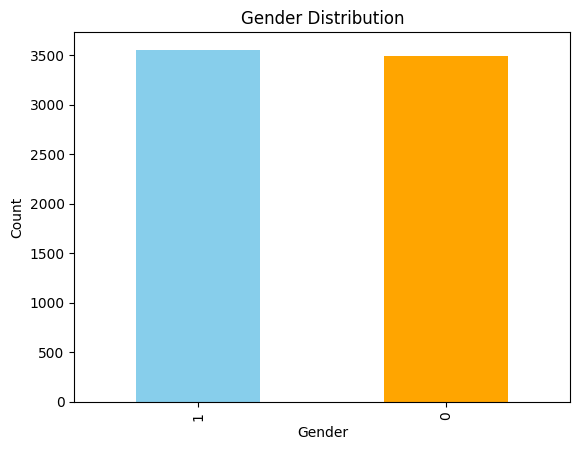

In [4]:
df['gender'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Senior Citizen distribution**

SeniorCitizen
0    83.785319
1    16.214681
Name: proportion, dtype: float64


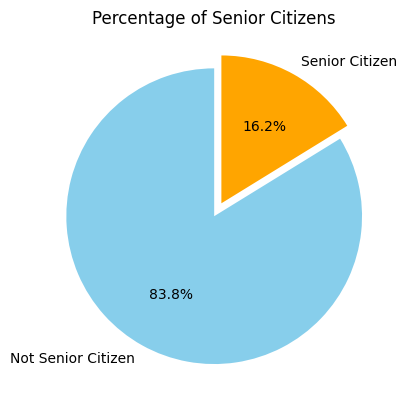

In [9]:
# Calculate the percentage of Senior Citizens
senior_citizen_percentage = df['SeniorCitizen'].value_counts(normalize=True) * 100
print(senior_citizen_percentage)

# Plot the distribution
labels = ['Not Senior Citizen', 'Senior Citizen']
colors = ['skyblue', 'orange']

plt.pie(senior_citizen_percentage, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0, 0.1))
plt.title('Percentage of Senior Citizens')
plt.show()

•	What is the distribution of customers with dependents (Dependents)?

Dependents
0    70.041176
1    29.958824
Name: proportion, dtype: float64


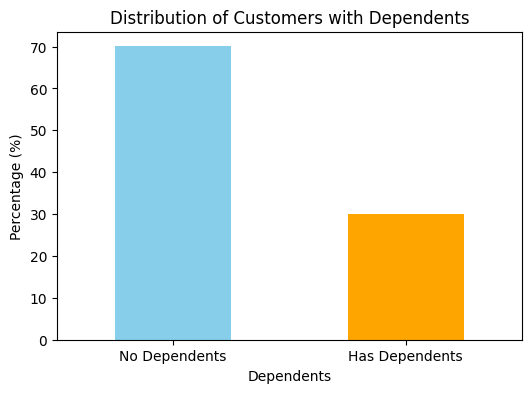

In [13]:
dependents_percentage = df['Dependents'].value_counts(normalize=True) * 100
print(dependents_percentage)
# Plot the distribution as a bar chart
labels = ['No Dependents', 'Has Dependents']
colors = ['skyblue', 'orange']

dependents_percentage.plot(kind='bar', color=colors, figsize=(6, 4))
plt.title('Distribution of Customers with Dependents')
plt.ylabel('Percentage (%)')
plt.xlabel('Dependents')
plt.xticks(ticks=[0, 1], labels=labels, rotation=0)
plt.show()

•	How many customers use PhoneService or MultipleLines?

In [14]:
# Count of customers using PhoneService
phone_service_count = df['PhoneService'].value_counts()
print("PhoneService Count:")
print(phone_service_count)

# Count of customers using MultipleLines
multiple_lines_count = df['MultipleLines'].value_counts()
print("\nMultipleLines Count:")
print(multiple_lines_count)

PhoneService Count:
PhoneService
1    6361
0     682
Name: count, dtype: int64

MultipleLines Count:
MultipleLines
0    3390
2    2971
1     682
Name: count, dtype: int64


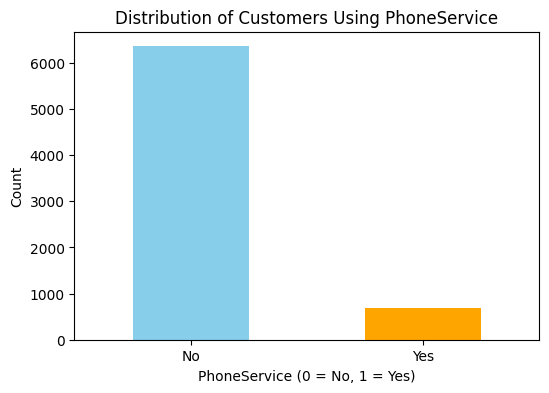

In [15]:
# Plotting PhoneService distribution
phone_service_count.plot(kind='bar', color=['skyblue', 'orange'], figsize=(6, 4))
plt.title('Distribution of Customers Using PhoneService')
plt.xlabel('PhoneService (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

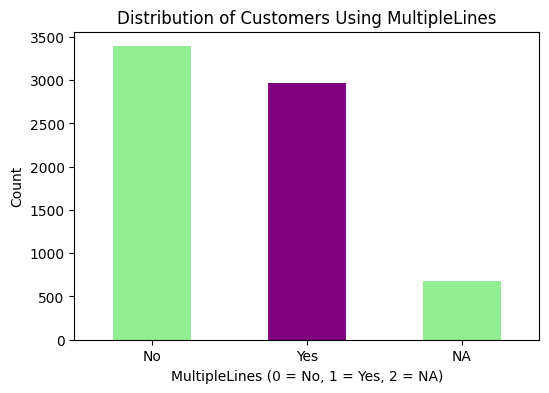

In [16]:
# Plotting MultipleLines distribution
multiple_lines_count.plot(kind='bar', color=['lightgreen', 'purple'], figsize=(6, 4))
plt.title('Distribution of Customers Using MultipleLines')
plt.xlabel('MultipleLines (0 = No, 1 = Yes, 2 = NA)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['No', 'Yes', 'NA'], rotation=0)
plt.show()

•	What is the average tenure of customers (tenure)?

In [17]:
# Calculate the average tenure
average_tenure = df['tenure'].mean()
print(f"Average Tenure of Customers: {average_tenure:.2f} months")


Average Tenure of Customers: 32.37 months


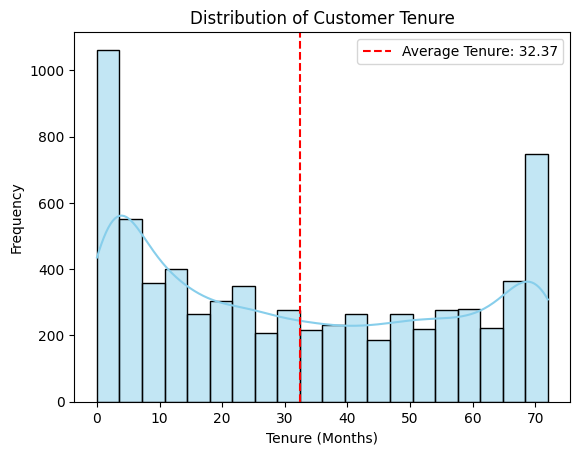

In [18]:
# Plot the distribution of tenure
sn.histplot(df['tenure'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.axvline(average_tenure, color='red', linestyle='dashed', linewidth=1.5, label=f'Average Tenure: {average_tenure:.2f}')
plt.legend()
plt.show()

•	What is the distribution of monthly charges (MonthlyCharges)? Are there any outliers?

In [19]:
# Summary statistics for MonthlyCharges
monthly_charges_stats = df['MonthlyCharges'].describe()
print("Summary Statistics for MonthlyCharges:")
print(monthly_charges_stats)


Summary Statistics for MonthlyCharges:
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


In [20]:
# Identify outliers using the IQR method
Q1 = df['MonthlyCharges'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['MonthlyCharges'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['MonthlyCharges'] < lower_bound) | (df['MonthlyCharges'] > upper_bound)]
print(f"Number of Outliers in MonthlyCharges: {outliers.shape[0]}")


Number of Outliers in MonthlyCharges: 0


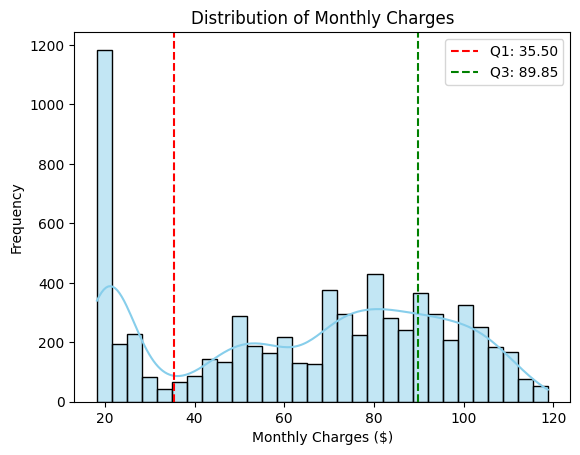

In [21]:
# Plot the distribution of MonthlyCharges
sn.histplot(df['MonthlyCharges'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
plt.axvline(Q1, color='red', linestyle='dashed', label=f'Q1: {Q1:.2f}')
plt.axvline(Q3, color='green', linestyle='dashed', label=f'Q3: {Q3:.2f}')
plt.legend()
plt.show()

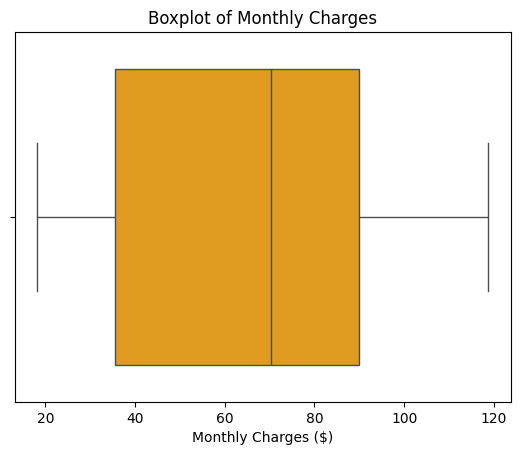

In [22]:
# Plot a boxplot to visualize outliers
sn.boxplot(x=df['MonthlyCharges'], color='orange')
plt.title('Boxplot of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.show()

•	How are total charges (TotalCharges) spread across the dataset? What is the range?

In [23]:
# Summary statistics for TotalCharges
total_charges_stats = df['TotalCharges'].describe()
print("Summary Statistics for TotalCharges:")
print(total_charges_stats)

# Calculate the range
total_charges_range = total_charges_stats['max'] - total_charges_stats['min']
print(f"Range of TotalCharges: {total_charges_range:.2f}")

Summary Statistics for TotalCharges:
count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64
Range of TotalCharges: 8684.80


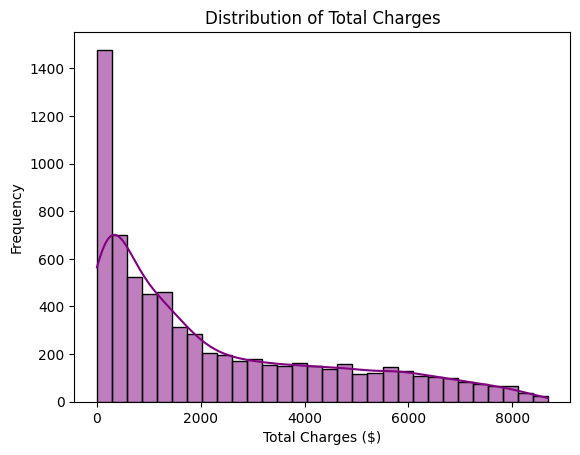

In [24]:
# Plot the distribution of TotalCharges
sn.histplot(df['TotalCharges'], kde=True, color='purple', bins=30)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges ($)')
plt.ylabel('Frequency')
plt.show()

•	What percentage of customers have churned (Churn)?

In [25]:
# Calculate the percentage of customers who have churned
churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print("Percentage of Customers Who Have Churned:")
print(churn_percentage)


Percentage of Customers Who Have Churned:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


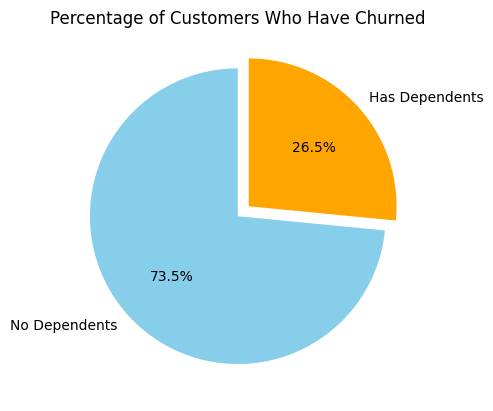

In [26]:
# Plot the churn percentages as a pie chart
plt.pie(churn_percentage, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0, 0.1))
plt.title('Percentage of Customers Who Have Churned')
plt.show()

•	How many customers use paperless billing (PaperlessBilling)?

In [29]:
# Count of customers using PaperlessBilling
Pb_count = df['PaperlessBilling'].value_counts()
print("PaperlessBilling Count:")
print(Pb_count)

Percentage of Customers Who Have PaperlessBilling:
PaperlessBilling
1    59.221922
0    40.778078
Name: proportion, dtype: float64
PaperlessBilling Count:
PaperlessBilling
1    4171
0    2872
Name: count, dtype: int64


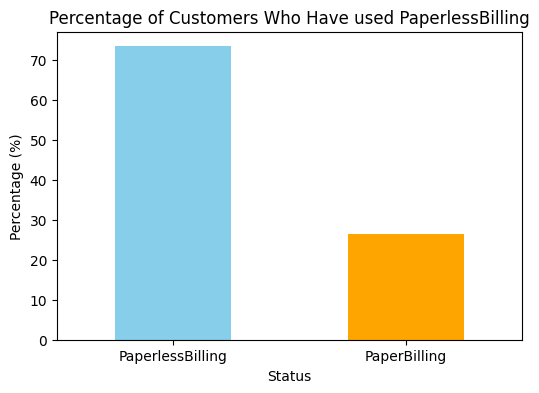

In [28]:
# Plot the percentages as a bar chart
labels = ['PaperlessBilling', 'PaperBilling']
colors = ['skyblue', 'orange']

churn_percentage.plot(kind='bar', color=colors, figsize=(6, 4))
plt.title('Percentage of Customers Who Have used PaperlessBilling')
plt.ylabel('Percentage (%)')
plt.xlabel('Status')
plt.xticks(ticks=[0, 1], labels=labels, rotation=0)
plt.show()

•	What percentage of customers have online security (OnlineSecurity) enabled?

In [30]:
# Calculate the percentage of customers who have churned
online_sec = df['OnlineSecurity'].value_counts(normalize=True) * 100
print("Percentage of Customers Who Have OnlineSecurity:")
print(online_sec)


Percentage of Customers Who Have OnlineSecurity:
OnlineSecurity
0    49.666335
2    28.666761
1    21.666903
Name: proportion, dtype: float64


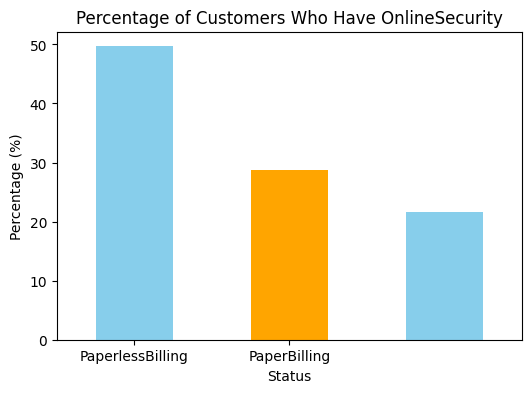

In [32]:
# Plot the Percentage of Customers Who Have OnlineSecurity as a pie chart
online_sec.plot(kind='bar', color=colors, figsize=(6, 4))
plt.title('Percentage of Customers Who Have OnlineSecurity')
plt.ylabel('Percentage (%)')
plt.xlabel('Status')
plt.xticks(ticks=[0, 1], labels=labels, rotation=0)
plt.show()

•	How many customers use device protection (DeviceProtection)?

In [35]:
# Count of customers using DeviceProtection
DP_count = df['DeviceProtection'].value_counts()
print("DeviceProtection Count:")
print(DP_count)

DeviceProtection Count:
DeviceProtection
0    3095
2    2422
1    1526
Name: count, dtype: int64


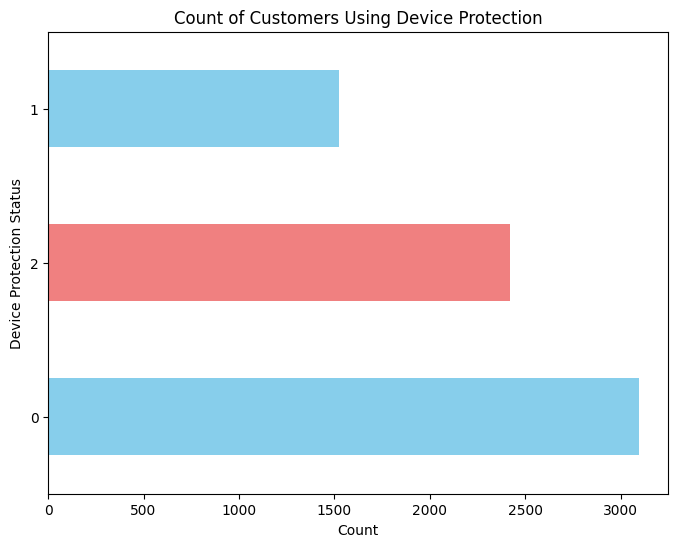

In [40]:
# Plot the churn percentages as a horizontal bar chart 
plt.figure(figsize=(8, 6))
DP_count.plot(kind='barh', color=['skyblue', 'lightcoral'])
plt.title('Count of Customers Using Device Protection')
plt.xlabel('Count')
plt.ylabel('Device Protection Status')
plt.show()

•	What is the most common contract type (Contract)?

In [41]:
# Find the most common contract type
most_common_contract = df['Contract'].value_counts().idxmax()
count_of_most_common_contract = df['Contract'].value_counts().max()

print(f"The most common contract type is '{most_common_contract}' with {count_of_most_common_contract} customers.")


The most common contract type is '0' with 3875 customers.
